<a href="https://colab.research.google.com/github/rahulku91058/Training-AIML/blob/main/DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import important libraries**

In [65]:
!git clone https://github.com/rahulku91058/Training-AIML.git
%cd Training-AIML

Cloning into 'Training-AIML'...
remote: Enumerating objects: 135, done.
remote: Counting objects: 100% (135/135), done.
remote: Compressing objects: 100% (116/116), done.
remote: Total 135 (delta 47), reused 83 (delta 16), pack-reused 0 (from 0)
Receiving objects: 100% (135/135), 40.29 MiB | 21.84 MiB/s, done.
Resolving deltas: 100% (47/47), done.
/content/Training-AIML/Training-AIML/Deep Learning/Training-AIML


In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

# **Visualize a sample**

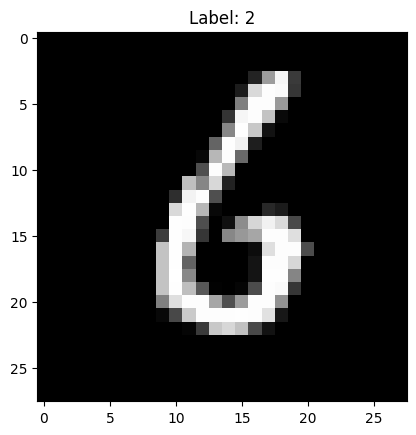

In [ ]:
plt.imshow(x_test[50], cmap='gray')
plt.title(f"Label: {y_train[25]}")
plt.show()

# **Build the model**

In [ ]:
model = Sequential([
    Input(shape=(28,28)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


# **Compile the model**

In [59]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


# Train the Model
model.fit(x_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9995 - loss: 0.0016 - val_accuracy: 0.9744 - val_loss: 0.2312
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9994 - loss: 0.0023 - val_accuracy: 0.9783 - val_loss: 0.1994
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9999 - loss: 3.3437e-04 - val_accuracy: 0.9773 - val_loss: 0.2294
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9994 - loss: 0.0019 - val_accuracy: 0.9757 - val_loss: 0.2361
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9989 - loss: 0.0043 - val_accuracy: 0.9786 - val_loss: 0.2063


# **Testing the Model**

In [60]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9750 - loss: 0.2059
Test Accuracy: 0.9782999753952026


# **make a prediction**

In [61]:
predictions = model.predict(x_test)
print(predictions[0].argmax())

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
7


In [62]:
model.save("neural.keras")

In [64]:
from PIL import Image
import numpy as np

# Load The trained model
newmodel = tf.keras.models.load_model("/content/Training-AIML/neural.keras")

img=Image.open('/content/Image.jpg')
img = img.convert('L')
img = img.resize((28, 28))
img = np.array(img)
img = img.reshape(1, 28, 28,1)

prediction = newmodel.predict(img)
print(prediction.argmax())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
6
